Aula 1 - Clasificación: ¿Cómo funciona?

1.1 - Importando los datos

In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_csv('Customer.csv')

In [ ]:
datos.shape

(7043, 18)

In [ ]:
datos.head()

,Mayor60Años,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVCable,Streaming,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,UnAño,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,UnAño,No,DebitoEnCuenta,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si


1.2 - Analizando las Variables

In [ ]:
#Modificación de forma manual
diccionario = {'Si': 1,
                'No': 0}

datosmodificados = datos[['Conyuge', 'Dependientes', 'TelefonoFijo', 'PagoOnline', 'Churn']].replace(diccionario)
datosmodificados.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [ ]:
#Transformación con get_dummies
dummie_datos = pd.get_dummies(datos.drop(['Conyuge', 'Dependientes', 'TelefonoFijo', 'PagoOnline', 'Churn'],
                axis=1))

#Unión de los datos transformados con los que ya teníamos
datos_final = pd.concat([datosmodificados, dummie_datos], axis=1)

In [ ]:
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,...,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,False,False,...,True,False,False,False,True,False,True,False,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,True,False,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,True,False,False
3,0,0,0,0,0,0,45,42.30,False,False,...,True,False,False,False,False,True,False,False,True,False
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,True,False,False,False


1.3 - Definición Formal
Informaciones para la clasificación:

 X= inputs (datos de entrada)

 y= outputs (datos de salida)

In [ ]:
#TIP
pd.set_option('display.max_columns', 39)

In [ ]:
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVCable_No,TVCable_Si,TVCable_SinServicioDeInternet,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
3,0,0,0,0,0,0,45,42.30,False,False,True,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False


In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [ ]:
#ymaria = ?

1.4 - Balanceamiento de los datos

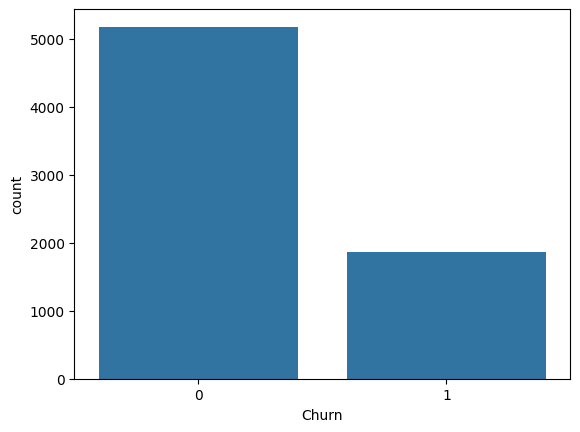

In [ ]:
#variable target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=datos_final)

In [ ]:
datos_final.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
#biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [ ]:
#dividiendo los datos en características y target
X = datos_final.drop('Churn', axis = 1)
y = datos_final['Churn']

In [ ]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [ ]:
#unión de los datos balanceados
datos_final = pd.concat([X, y], axis=1)

In [ ]:
#verificación 1 - unión de los datos
datos_final.head(2)

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVCable_No,TVCable_Si,TVCable_SinServicioDeInternet,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito,Churn
0,1,0,0,1,0,1,29.85,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,0


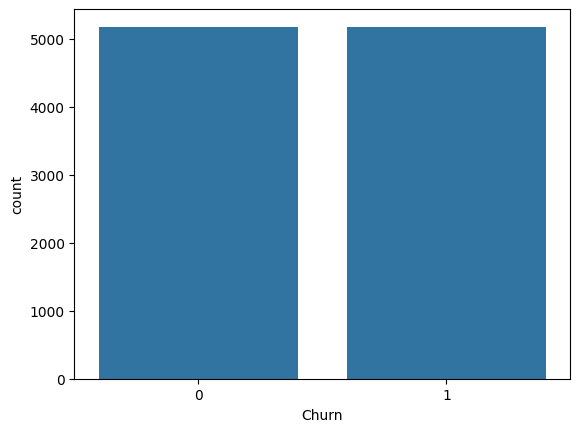

In [ ]:
#verificación 2 - balanceamiento
ax = sns.countplot(x='Churn', data=datos_final)

In [ ]:
datos_final.Churn.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

Aula 2 - Método baseado en la proximidad

2.1 - Modelo K-nearest neighbors (KNN)
(PPT)

2.2 - KNN en la práctica

In [ ]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [ ]:
#ymaria = ?

In [ ]:
#División en inputs y outputs
X = datos_final.drop('Churn', axis = 1)
y = datos_final['Churn']

In [ ]:
#biblioteca para padronizar los datos
from sklearn.preprocessing import StandardScaler

In [ ]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ..., -0.54757347,
        -0.5315994 , -0.50790015],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.82623896,
        -0.5315994 , -0.50790015],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.82623896,
        -0.5315994 , -0.50790015],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.54757347,
        -0.5315994 , -0.50790015],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.54757347,
        -0.5315994 ,  1.96889095],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.54757347,
        -0.5315994 ,  1.96889095]])

In [ ]:
X_normalizado[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.99594945, -0.93594717,  3.06083934,
        1.48315631, -1.05853285, -0.44850949,  0.77803383, -0.59639952,
       -0.44850949, -1.09729069,  1.35121363, -0.44850949,  0.91935908,
       -0.73960631, -0.44850949,  0.7857356 , -0.60652979, -0.44850949,
        1.08898545, -0.84638695, -0.44850949,  1.10588699, -0.85787548,
       -0.44850949, -0.4605816 ,  0.68807296, -0.47286547,  1.05423234,
       -0.54757347, -0.5315994 , -0.50790015])

In [ ]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.00406703, -0.93594717, -0.32670777,
        -0.67423777,  0.94470379, -0.44850949,  0.77803383, -0.59639952,
        -0.44850949, -1.09729069, -0.74007543,  2.22960721,  0.91935908,
         1.35207067, -0.44850949, -1.27269275,  1.64872363, -0.44850949,
         1.08898545, -0.84638695, -0.44850949, -0.90425153, -0.85787548,
         2.22960721, -0.4605816 , -1.45333425,  2.1147664 , -0.9485575 ,
        -0.54757347, -0.5315994 ,  1.96889095]])

In [ ]:
import numpy as np

In [ ]:
a = Xmaria_normalizado

In [ ]:
b = X_normalizado[0]

In [ ]:
#1 - comenzamos restando
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.0416644 ,  0.34941017,  2.00001647,  0.        , -3.38754711,
        -2.15739408,  2.00323664,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -2.09128905,  2.6781167 ,  0.        ,
         2.09167698,  0.        , -2.05842835,  2.25525342,  0.        ,
         0.        ,  0.        ,  0.        , -2.01013852,  0.        ,
         2.6781167 ,  0.        , -2.14140721,  2.58763186, -2.00278985,
         0.        ,  0.        ,  2.4767911 ]])

In [ ]:
#2 - después realizamos la exponenciación
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592202e-03, 1.22087466e-01, 4.00006590e+00,
        0.00000000e+00, 1.14754754e+01, 4.65434920e+00, 4.01295706e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.37348990e+00, 7.17230906e+00, 0.00000000e+00,
        4.37511260e+00, 0.00000000e+00, 4.23712727e+00, 5.08616800e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.04065686e+00, 0.00000000e+00, 7.17230906e+00, 0.00000000e+00,
        4.58562485e+00, 6.69583866e+00, 4.01116717e+00, 0.00000000e+00,
        0.00000000e+00, 6.13449413e+00]])

In [ ]:
#3 - realizamos la suma
np.sum(np.square(a-b))

97.85224097854469

In [ ]:
#4 - finalmente obtenemos la raiz cuadrada y tenemos nuestra distancia
np.sqrt(103.36325779671671)

10.166772240820423

2.3 - Implementando el modelo

In [ ]:
#biblioteca para división de los datos
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

Entrenamiento y prueba

In [ ]:
#biblioteca para crear el modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#iniciar el modelo (creamos el modelo) - por default son 5 vecinos
knn = KNeighborsClassifier(metric='euclidean')

In [ ]:
#entrenando el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
#probando el modelo con los datos de prueba
prediccion_knn = knn.predict(X_test)

In [ ]:
prediccion_knn

array([1, 0, 0, ..., 0, 1, 1])

Aula 3 - Método probabilístico

3.1 - Teorema de Naive Bayes
(PPT)

3.2 - Modelo Bernoulli Naive Bayes
(PPT)

3.3 - Entrenamiento y prueba

In [ ]:
#biblioteca para crear el modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [ ]:
#escojo utilizar mediana, porque es el valor central de nuestros datos ordenados
mediana = np.median(X_train)
mediana

-0.44850949388572553

In [ ]:
#Binarizando los recursos usando la mediana
X_train_binarizado = np.where(X_train > mediana, 1, 0)

In [ ]:
X_train_binarizado

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
y_train

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [ ]:
#creamos el modelo
bnb = BernoulliNB()

In [ ]:
#entrenando el modelo
bnb.fit(X_train_binarizado, y_train)

BernoulliNB()

In [ ]:
#Binarizando la base de prueba
X_test_binarizado = np.where(X_test > np.median(X_test), 1, 0)

In [ ]:
#probando el modelo
prediccion_BNb = bnb.predict(X_test_binarizado)

In [ ]:
prediccion_BNb

array([1, 0, 0, ..., 1, 1, 1])

Aula 4 - Método Simbólico

4.1 - ¿Qué es un árbol de decisión?
(PPT)

4.2 - ¿Cómo funciona un árbol de decisión?
(PPT)

4.3 - Implementando el modelo

In [ ]:
#biblioteca para crear el modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#iniciando el modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#entrenando el modelo
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#verificando la importancia de cada atributo
dtc.feature_importances_

array([0.01969184, 0.01455279, 0.00306493, 0.01933477, 0.01562992,
       0.15143062, 0.20503502, 0.00910954, 0.01267994, 0.00233962,
       0.        , 0.00760992, 0.        , 0.05402825, 0.0168293 ,
       0.        , 0.01208257, 0.00901889, 0.        , 0.00830528,
       0.01153534, 0.        , 0.01593179, 0.01366013, 0.0002835 ,
       0.00560876, 0.00543446, 0.        , 0.0096647 , 0.01831992,
       0.        , 0.00919788, 0.23348935, 0.0274953 , 0.03631415,
       0.01287174, 0.02149708, 0.01795271])

In [ ]:
prediccion_ArbolDecision = dtc.predict(X_test)

In [ ]:
prediccion_ArbolDecision

array([0, 0, 0, ..., 0, 1, 1])

5 - Validación de los modelos

5.1 - Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, prediccion_knn))

[[1246  323]
 [ 264 1272]]


In [ ]:
print(confusion_matrix(y_test, prediccion_BNb))

[[1066  503]
 [ 207 1329]]


In [ ]:
print(confusion_matrix(y_test, prediccion_ArbolDecision))

[[1269  300]
 [ 273 1263]]


5.2 - Accuracy

A partir del cálculo de la matriz de confusión, podemos inferir otras métricas, como el accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#modelo KNN
print(accuracy_score(y_test, prediccion_knn))

0.8109500805152979


In [ ]:
#modelo Bernoulli de Naive Bayes
print(accuracy_score(y_test, prediccion_BNb))

0.7713365539452496


In [ ]:
#modelo Arbol de Decisión
print(accuracy_score(y_test, prediccion_ArbolDecision))

0.8154589371980676


5.3 - Precisión

Otra métrica importante es la precisión, que calcula cuántos se clasificaron correctamente como positivos (TP).

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
#modelo KNN
print(precision_score(y_test, prediccion_knn))

0.7974921630094044


In [ ]:
#modelo Bernoulli de Naive Bayes
print(precision_score(y_test, prediccion_BNb))

0.7254366812227074


In [ ]:
#modelo Arbol de Decisión
print(precision_score(y_test, prediccion_ArbolDecision))

0.8080614203454894


5.4 - Recall

Otra métrica es el Recall o sensibilidad, calcula qué tan bueno es el modelo para clasificar correctamente un resultado positivo (TP).

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
#modelo KNN
print(recall_score(y_test, prediccion_knn))

0.828125


In [ ]:
#modelo Bernoulli de Naive Bayes
print(recall_score(y_test, prediccion_BNb))

0.865234375


In [ ]:
#modelo Arbol de Decisión
print(recall_score(y_test, prediccion_ArbolDecision))

0.822265625


5.5 - Escogiendo el mejor modelo

In [ ]:
#Ejemplo - análisis de las precisiones previamente calculadas
print('Modelo KNN: ', precision_score(y_test, prediccion_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_test, prediccion_BNb))
print('Modelo Arbol de Decisión: ', precision_score(y_test, prediccion_ArbolDecision))

Modelo KNN:  0.7974921630094044
Modelo Bernoulli de Naive Bayes:  0.7254366812227074
Modelo Arbol de Decisión:  0.8080614203454894


In [ ]:
#Probando el mejor modelo para Maria
prediccion_maria = knn.predict(Xmaria_normalizado)
diccionario = {'Si': 1, 'No': 0}

clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion_maria[0]), None)
print(f"La probabilidad de que Maria se convierta en Churn es: {clave_encontrada}")

La probabilidad de que Maria se convierta en Churn es: No
